<a href="https://colab.research.google.com/github/pompeedu/firuzjonq/blob/main/sales_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

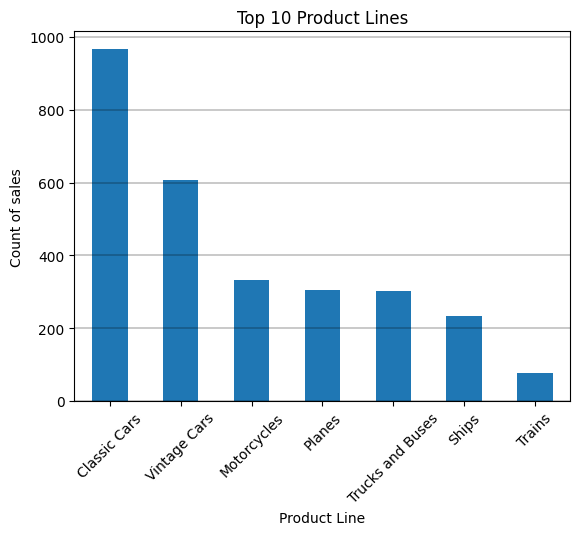

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data_sample.csv", encoding="latin1")

# Top-10 Product Lines

top_products = df["PRODUCTLINE"].value_counts().head(10)
top_products.plot(kind="bar")
plt.title("Top 10 Product Lines")
plt.ylabel("Count of sales")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.grid(axis='y', color='black', linewidth=0.3)
plt.show()

Text(0.5, 0, '')

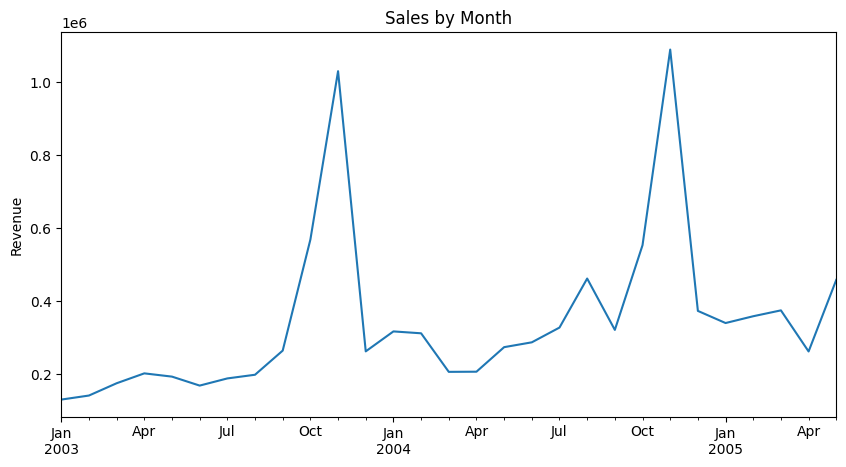

In [8]:
# Sales by month
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum().plot(kind='line', figsize=(10,5))
plt.title("Sales by Month")
plt.ylabel("Revenue")
plt.xlabel(None)

Text(0.5, 0, 'Customer Names')

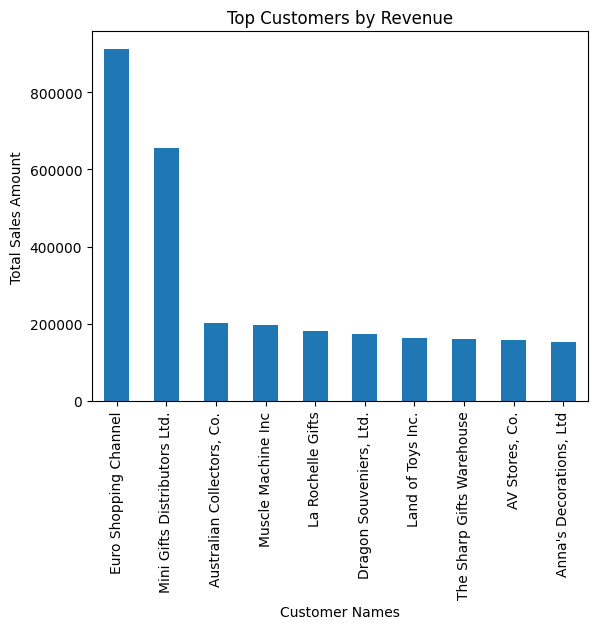

In [9]:
# Top Customers
df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10).plot(kind='bar', xlabel='Customer Name')

plt.title("Top Customers by Revenue")
plt.ylabel("Total Sales Amount")
plt.xlabel("Customer Names")

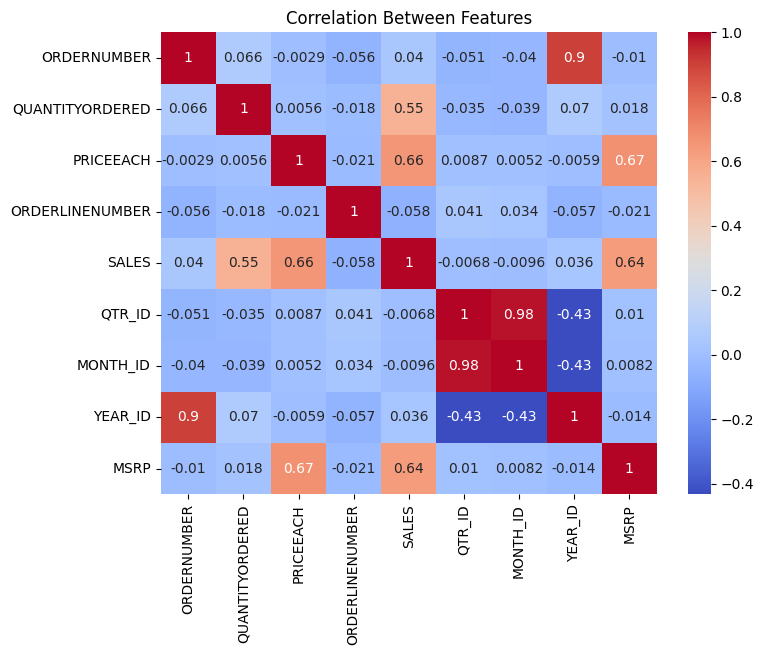

In [10]:
import seaborn as sns

# Correlation matrix between features

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Features")
plt.show()

In [11]:
# Dashboard in Plotly (Inside Colab)

import plotly.express as px
import pandas as pd

df = pd.read_csv("sales_data_sample.csv", encoding="latin1")

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

df.columns

df['YearMonth'] = df['ORDERDATE'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('YearMonth')['SALES'].sum().reset_index()

fig = px.line(monthly_sales, x='YearMonth', y='SALES', title='Sales by Month')
fig.show()

In [12]:
# Top 10 Customers by Sales
top_clients = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(top_clients, x='CUSTOMERNAME', y='SALES', title='Top 10 Customers by Sales')
fig.show()

In [13]:
# Sales Distribution by Product Categories
fig = px.pie(df, names='PRODUCTLINE', values='SALES', title='Sales Distribution by Product Categories')
fig.show()